In [48]:
import pandas as pd
import math
import matplotlib.pyplot as plt
#matplotlib inline

In [49]:
odom_pos = pd.read_json('../tmp_datas/odom_pos.json')
real_pos = pd.read_json('../tmp_datas/real_pos.json')

In [50]:
print(odom_pos.shape)
print(real_pos.shape)

(29676, 3)
(247339, 3)


In [51]:
odom_pos.head()

,time,x,y
0,196745000000,6.774864,-0.166294
1,196745000000,6.777226,-0.165493
2,196756000000,6.777226,-0.165493
3,196776000000,6.777226,-0.165493
4,196779000000,6.777226,-0.165493


In [52]:
odom_pos.tail()

,time,x,y
29671,444030000000,7.449432,9.253451
29672,444036000000,7.449432,9.253451
29673,444052000000,7.449276,9.253682
29674,444052000000,7.449136,9.253890
29675,444056000000,7.449136,9.253890


In [53]:
real_pos.head()

,time,x,y
0,196741000000,-1.684108,0.595685
1,196741000000,-1.684199,0.595598
2,196741000000,-1.684290,0.595512
3,196741000000,-1.684381,0.595425
4,196741000000,-1.684472,0.595339


In [54]:
real_pos.tail()

,time,x,y
247334,444068000000,1.976524,1.590011
247335,444069000000,1.976524,1.590017
247336,444070000000,1.976523,1.590024
247337,444071000000,1.976523,1.590030
247338,444072000000,1.976523,1.590037


In [55]:
threshold = 3000000

tmp_list = []
for idx, row in odom_pos.iterrows():
    min_t = row['time'] - threshold
    max_t = row['time'] + threshold
#     print(real_pos[])
    df = real_pos[(real_pos['time']>min_t) & (real_pos['time']<max_t)].copy()
    real_xy = df[["x", "y"]].mean()
    tmp_list.append({
        "time": row['time'],
        "odom_x": row['x'],
        "odom_y": row['y'],
        "real_x": 5 - real_xy.x,
        "real_y": 2.3 - real_xy.y,
    })
df_odom_And_real = pd.DataFrame(tmp_list)
df_odom_And_real.head()

,odom_x,odom_y,real_x,real_y,time
0,6.774864,-0.166294,6.685111,1.705270,1.967450e+11
1,6.777226,-0.165493,6.685111,1.705270,1.967450e+11
2,6.777226,-0.165493,6.686115,1.706229,1.967560e+11
3,6.777226,-0.165493,6.687924,1.707964,1.967760e+11
4,6.777226,-0.165493,6.688195,1.708224,1.967790e+11


In [56]:
df_odom_And_real = df_odom_And_real[df_odom_And_real['odom_x']>0.1].copy()
df_odom_And_real.head()

,odom_x,odom_y,real_x,real_y,time
0,6.774864,-0.166294,6.685111,1.705270,1.967450e+11
1,6.777226,-0.165493,6.685111,1.705270,1.967450e+11
2,6.777226,-0.165493,6.686115,1.706229,1.967560e+11
3,6.777226,-0.165493,6.687924,1.707964,1.967760e+11
4,6.777226,-0.165493,6.688195,1.708224,1.967790e+11
5,6.779612,-0.164676,6.689142,1.709136,1.967890e+11
6,6.781981,-0.163857,6.689142,1.709136,1.967890e+11
7,6.781981,-0.163857,6.689724,1.709699,1.967960e+11
8,6.781981,-0.163857,6.691474,1.711395,1.968160e+11
9,6.781981,-0.163857,6.692558,1.712450,1.968290e+11


In [57]:
x_mean_delta = (df_odom_And_real['odom_x']-df_odom_And_real['real_x']).abs().mean()
y_mean_delta = (df_odom_And_real['odom_y']-df_odom_And_real['real_y']).abs().mean()

error = math.sqrt(x_mean_delta**2 + y_mean_delta**2)
print(error)

4.174290238112514


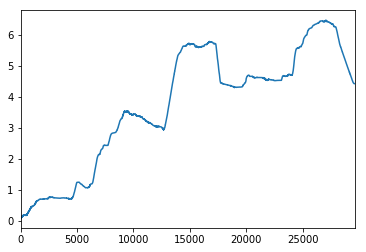

In [58]:
df = (df_odom_And_real['odom_x']-df_odom_And_real['real_x']).abs()
df.plot()

In [12]:
df_odom_And_real.head()

,odom_x,odom_y,real_x,real_y,time
0,6.789725,1.595471,6.693203,1.713079,1.968370e+11
1,6.789725,1.595471,6.694686,1.714531,1.968560e+11
2,6.789725,1.595471,6.696220,1.716037,1.968760e+11
3,6.789725,1.595471,6.696451,1.716265,1.968790e+11
4,6.791308,1.596979,6.696529,1.716341,1.968800e+11


In [28]:
past_pos = []
past_time = 0

delta_trans_list = []
delta_time_list = []

for idx, row in df_odom_And_real.iterrows():
    if past_pos == []:
        past_pos = [row['real_x'], row['real_y']]
        past_time = row['time']
        delta_trans_list.append(None)
        delta_time_list.append(None)
        continue
    dx = row['real_x'] - past_pos[0]
    dy = row['real_y'] - past_pos[1]
    delta_trans = math.sqrt(dx**2+dy**2)
    delta_trans_list.append(delta_trans)
    delta_time = row['time'] - past_time
    delta_time_list.append(delta_time)
df_odom_And_real['delta_trans'] = delta_trans_list
df_odom_And_real['delta_time'] = delta_time_list

In [29]:
df_odom_And_real.head()

,odom_x,odom_y,real_x,real_y,time,delta_trans,delta_time
0,6.789725,1.595471,6.693203,1.713079,1.968370e+11,0.000000,1.0
1,6.789725,1.595471,6.694686,1.714531,1.968560e+11,0.002076,19000000.0
2,6.789725,1.595471,6.696220,1.716037,1.968760e+11,0.004226,39000000.0
3,6.789725,1.595471,6.696451,1.716265,1.968790e+11,0.004550,42000000.0
4,6.791308,1.596979,6.696529,1.716341,1.968800e+11,0.004659,43000000.0


In [30]:
df_odom_And_real['vel.'] = df_odom_And_real['delta_trans'] / (df_odom_And_real['delta_time']/10**9)

In [32]:
df_odom_And_real.head()

,odom_x,odom_y,real_x,real_y,time,delta_trans,delta_time,vel.
0,6.789725,1.595471,6.693203,1.713079,1.968370e+11,0.000000,1.0,0.000000
1,6.789725,1.595471,6.694686,1.714531,1.968560e+11,0.002076,19000000.0,0.109244
2,6.789725,1.595471,6.696220,1.716037,1.968760e+11,0.004226,39000000.0,0.108355
3,6.789725,1.595471,6.696451,1.716265,1.968790e+11,0.004550,42000000.0,0.108339
4,6.791308,1.596979,6.696529,1.716341,1.968800e+11,0.004659,43000000.0,0.108340


In [38]:
df = pd.DataFrame({
    'error': df,
    'vel.': df_odom_And_real['vel.']
})

In [43]:
df.head()

,error,vel.
0,0.0965222,0.000000
1,0.0950386,0.109244
2,0.0935047,0.108355
3,0.0932735,0.108339
4,0.0947797,0.108340


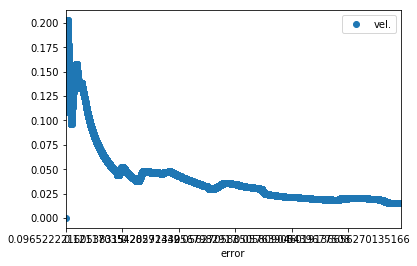

In [47]:
df.plot(x='error', y='vel.', style='o')